<a href="https://colab.research.google.com/github/dablro12/AI_study/blob/main/HW3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 초기설정 

In [123]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd 
import random
import math as math

In [124]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/data/0327/data0327.xlsx')
df.head()

,취미,운동,공부,수면,오늘기분
0,8.0,0.0,2.0,12.0,0.0
1,3.0,0.0,3.0,7.0,1.0
2,1.0,0.0,5.0,7.0,1.0
3,2.0,1.0,6.0,8.0,3.0
4,3.0,2.0,2.0,7.0,5.0


In [125]:
x = torch.tensor(df.iloc[:,:-1].to_numpy()).to(torch.float) #x_class를 4개니까 4개 가지고오고, numpy형태로바꿧다가 float 값을 가진 tensor로 바꿔주기
y = torch.tensor(df.iloc[:,-1].to_numpy()).to(torch.float) #y_class는 1개니까 -> df -> numpy -> tensor
print(x.shape)
print(y.shape)

x_vd = x.clone()
y_vd = y.clone()


torch.Size([33, 4])
torch.Size([33])


In [126]:
#data loader 만들기
def data_iter(data, label, batch_size):
  N,num_features = data.shape
  inds = list(range(N))
  random.shuffle(inds)
  for i in range(0,N,batch_size):
    batch_inds = inds[i:min(i+batch_size, N)]
    batch_data = data[batch_inds,:]
    batch_label = label[batch_inds]
    yield batch_data, batch_label
  


#batch, lr에 따라 바뀐 플랏 확인

## learning rate = 0.1 일 때 batch size = 1, 8, 16, 33 

In [127]:
l_li = [0.1, 0.01, 0.001, 0.0001]
batch_li = [1, 8, 16, 33]
l_rate_dict = {
    l_li[0] : batch_li,
    l_li[1] : batch_li,
    l_li[2] : batch_li,
    l_li[3] : batch_li
}

loss_dict = {
    l_li[0] : list(),
    l_li[1] : list(),
    l_li[2] : list(),
    l_li[3] : list()
}
print(l_rate_dict) 

{0.1: [1, 8, 16, 33], 0.01: [1, 8, 16, 33], 0.001: [1, 8, 16, 33], 0.0001: [1, 8, 16, 33]}


In [128]:
def training(x, y, lr, batch):
  model = nn.Linear(4,1) #nn.linear(input feature, output feature)
  loss = nn.MSELoss() #L2 loss 
  optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9) #학습이 잘되도록 모멘텀을 넣어준다.
    
  print(f"lr : {lr}, batch : {batch}")
  l_rate = lr
  batch_size = batch
  epoch = 100
  loss_valid_epoch = []

  for j in np.arange(0, epoch):
    iterations = data_iter(x, y, batch_size)
    for batch_X, batch_y in iterations:
      y_hat = model(batch_X)
      l = loss(y_hat, batch_y)
      optimizer.zero_grad()
      l.sum().backward()
      optimizer.step()
    
    y_vd_hat = model(x_vd)
    l_all = loss(y_vd_hat, y_vd)
    loss_valid_epoch.append(l_all.sum().detach()/len(x_vd))
  plt.plot(loss_valid_epoch)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  #plt.axis([0,15,0,100])
  plt.show()

  return loss_valid_epoch 
  

lr : 0.1, batch : 1


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([33])) that is different to the input size (torch.Size([33, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


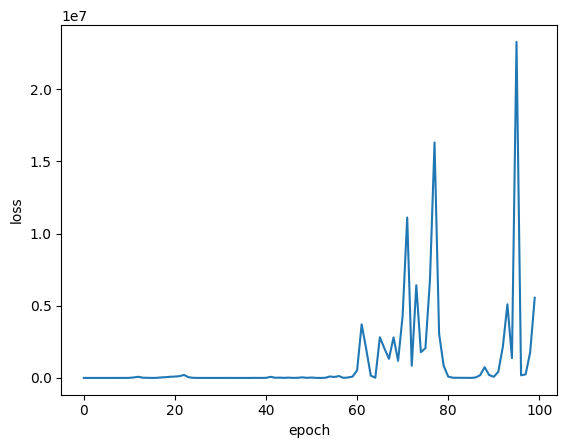

lr : 0.1, batch : 8


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


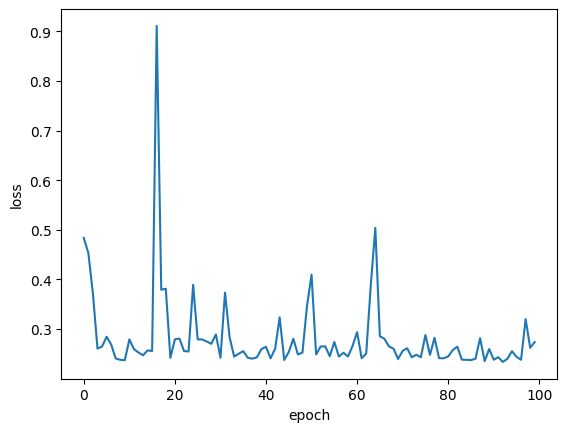

lr : 0.1, batch : 16


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


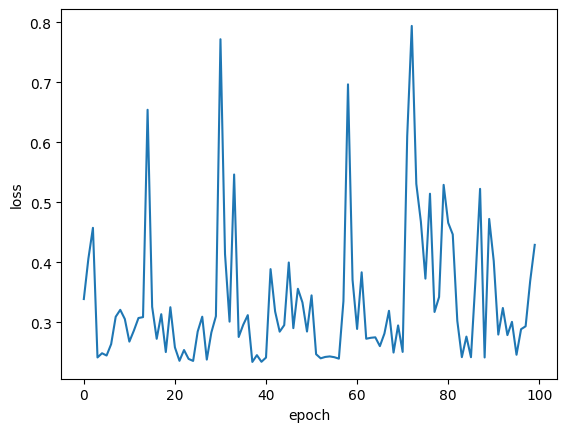

lr : 0.1, batch : 33


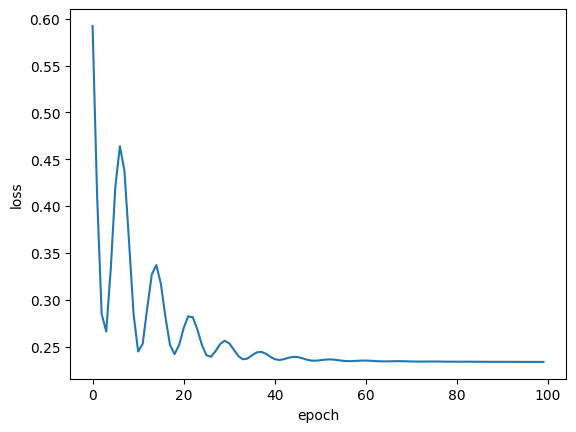

lr : 0.01, batch : 1


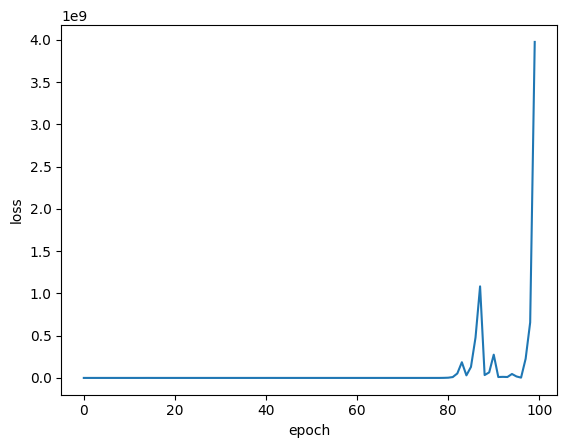

lr : 0.01, batch : 8


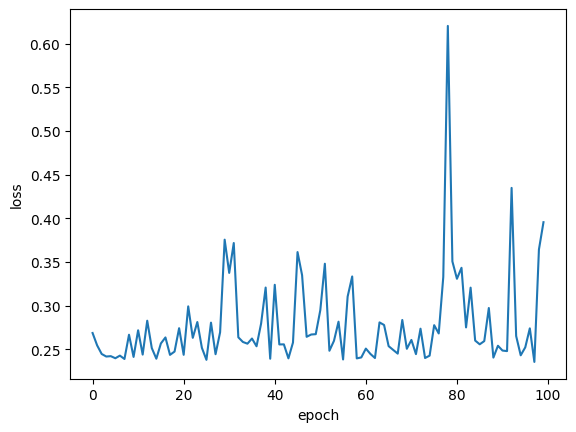

lr : 0.01, batch : 16


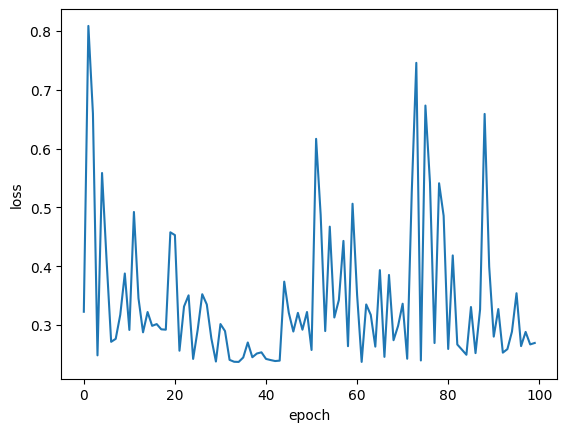

lr : 0.01, batch : 33


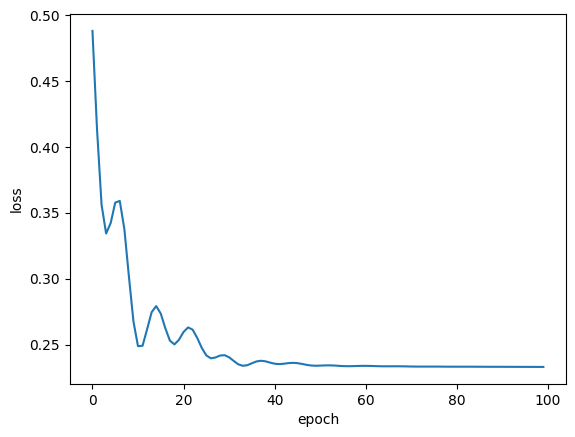

lr : 0.001, batch : 1


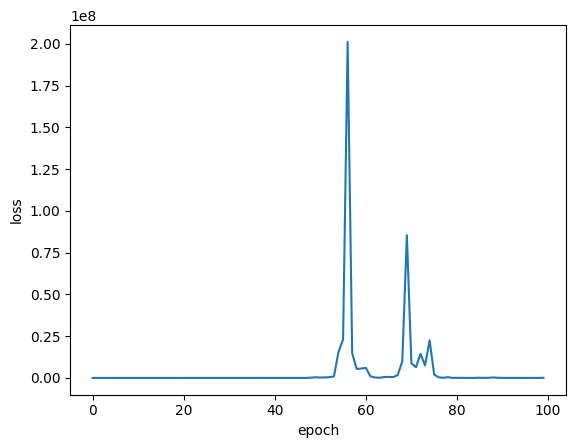

lr : 0.001, batch : 8


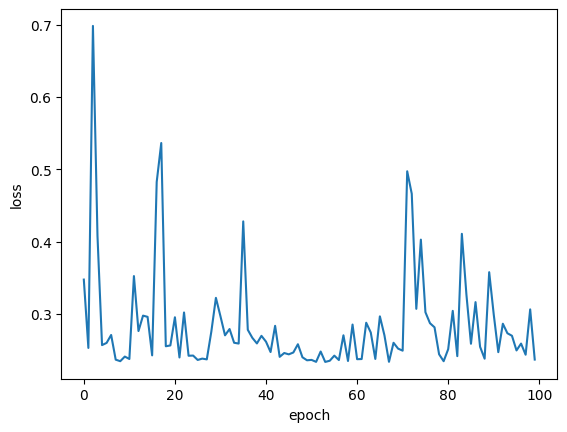

lr : 0.001, batch : 16


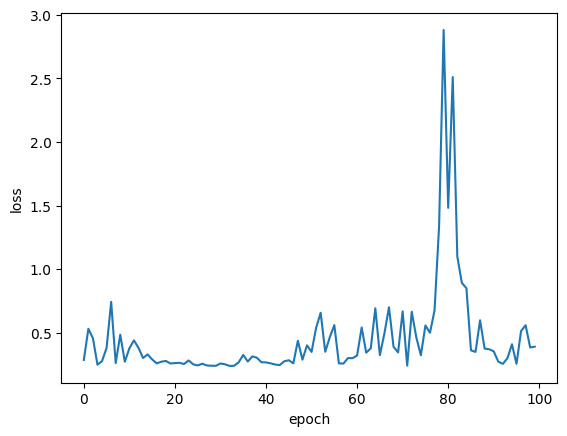

lr : 0.001, batch : 33


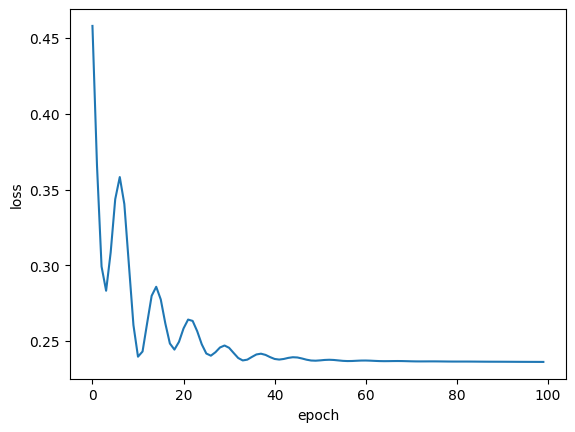

lr : 0.0001, batch : 1


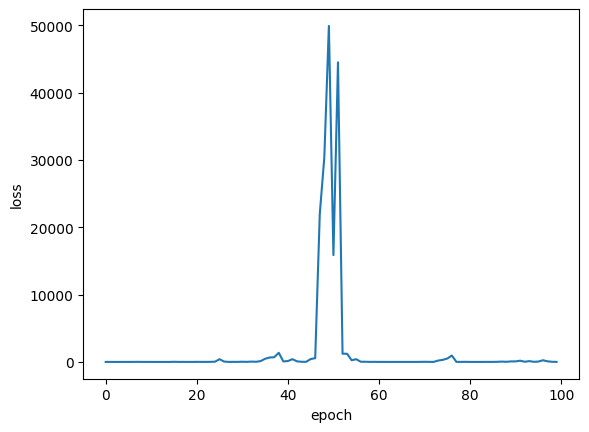

lr : 0.0001, batch : 8


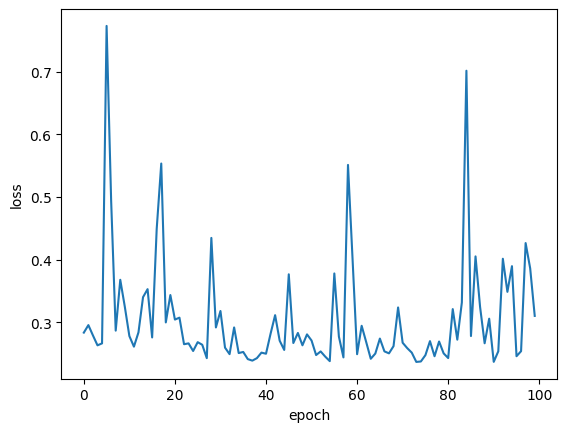

lr : 0.0001, batch : 16


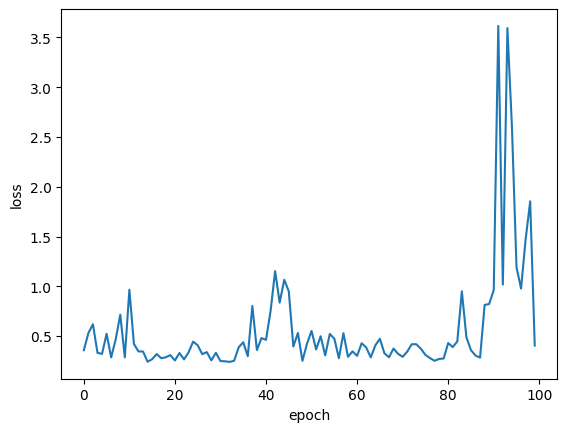

lr : 0.0001, batch : 33


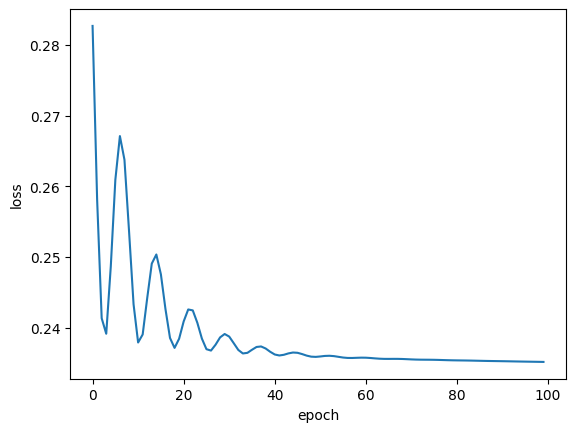

In [129]:
for lr, batch in l_rate_dict.items():
  for i in range(len(batch)):
    loss_valid_epoch = []
    loss_valid_epoch = training(x, y, lr, batch[i])
    loss_dict[lr].append(loss_valid_epoch)

In [146]:

#print(loss_dict[0.01][0])
#print(len(loss_dict[0.01][0]))
print(len(loss_dict.items()))

4


### 16개 한번에 plot

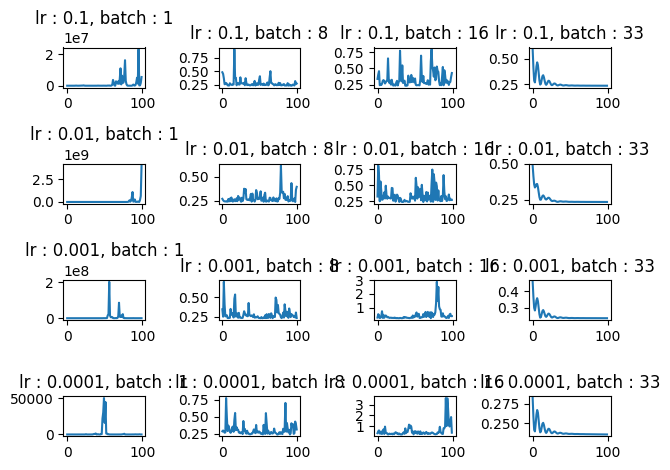

In [185]:
import seaborn as sns #시각화 라이브러리 seaborn 

##경로설정 #### 

#fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize=(16,16))
i = 0
for row in range(4):
  for col in range(4):   
    #print(loss_dict[l_li[row]][col])
    plt.subplot(4,4,i+1)
    plt.plot(loss_dict[l_li[row]][col])
    plt.title(f"lr : {l_li[row]}, batch : {batch_li[col]}")
#    plt.xlabel('epoch') 
  
    i += 1
plt.tight_layout()
#plt.subplots_adjust(hspace = 4, wspace = 4)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/3-1_바이오메디컬인공지능/HW3/hw3_loss.png', bbox_inches = 'tight')
plt.show()   

    #sns.countplot(data=loss_dict[l_li[row]][col])
